# Testing Schlogl's model on ABC

In [2]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

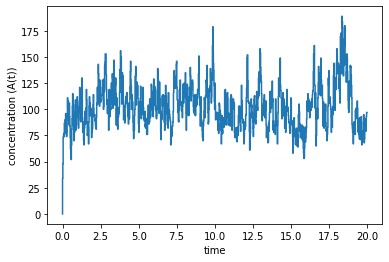

In [78]:
np.random.seed(3)

# Load a forward model
n_0 = 0
model = toy.stochastic.SchloglModel(n_0)

# Create some toy data
k = [0.18, 0.00025, 2200, 37.5]
times = np.linspace(0, 20, 1000)

values = model.simulate(k, times)
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)
# Create a uniform prior parameter
log_prior = pints.UniformLogPrior([0.15, 0.0002, 2000, 37], [0.2, 0.00035, 2500, 40])
# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)
plt.step(times, values)


plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()

# Rejection ABC

In [109]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(35)

# set target number of samples
abc.set_n_samples(100)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using Rejection ABC
Running in parallel with 8 worker processess.
Iter. Eval. Acceptance rate Time m:s
1     8      0.625            0:08.0
2     16     0.375            0:54.4
3     24     0.375            1:00.2
20    160    0.48125         14:39.8
Halting: target number of samples (101) reached.
Done


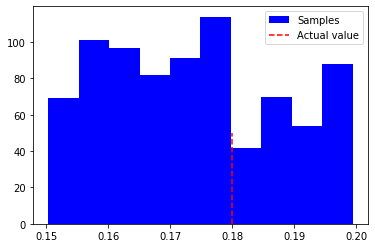

In [110]:
samples_flat = np.array([item for sublist in samples for item in sublist])

# print(samples_flat[:])
plt.hist(samples_flat[:,0], color="blue", label="Samples")
plt.vlines(x=0.18, linestyles='dashed', ymin=0, ymax=50, label="Actual value", color="red")
plt.legend()
plt.show()

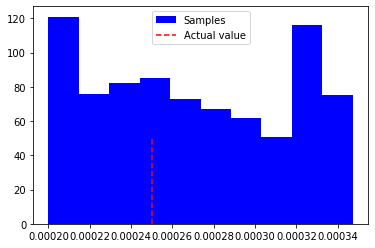

In [111]:
plt.hist(samples_flat[:,1], color="blue", label="Samples")
plt.vlines(x=0.00025, linestyles='dashed', ymin=0, ymax=50, label="Actual value", color="red")
plt.legend()
plt.show()

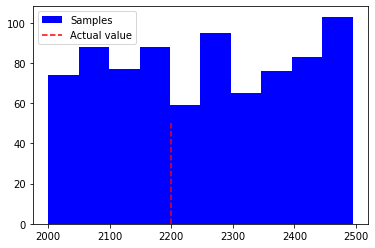

In [114]:
plt.hist(samples_flat[:,2], color="blue", label="Samples")
plt.vlines(x=2200, linestyles='dashed', ymin=0, ymax=50, label="Actual value", color="red")
plt.legend()
plt.show()

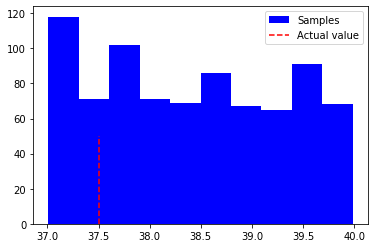

In [115]:
plt.hist(samples_flat[:,3], color="blue", label="Samples")
plt.vlines(x=37.5, linestyles='dashed', ymin=0, ymax=50, label="Actual value", color="red")
plt.legend()
plt.show()

# PMC

In [3]:
np.random.seed(3)

abc = pints.ABCController(error_measure, log_prior, method=pints.ABCPMC)

# set the threshold
abc.sampler().set_threshold(4)

# set target number of samples
# try this
abc.set_n_samples(1000)

# setting the number of generations
abc.sampler().set_n_generations(10)

# setting the threshold ratio
abc.sampler().set_t_ratio(0.99)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using PMC ABC
Running in sequential mode.
Iter. Eval. Acceptance rate Time m:s
1     63344  0.0158026017    29:52.9
Halting: target number of samples (1001) reached.
Done


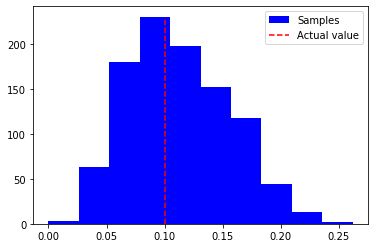

In [5]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=230, label="Actual value", color="red")
plt.legend()
plt.show()

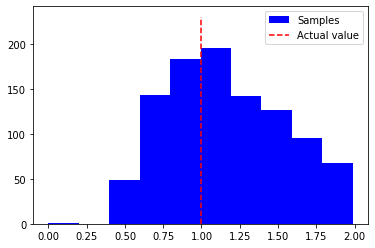

In [6]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=1, linestyles='dashed', ymin=0, ymax=230, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

# ABC SMC

In [12]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([9, 6, 4]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(200)

# set target number of samples
abc.set_n_samples(1000)

# log to screen
abc.set_log_to_screen(True)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in sequential mode.
Trying t=1, threshold=6
Trying t=2, threshold=4
Iter. Eval. Acceptance rate Time m:s
1     544    0.00183823529    0:02.3
2     548    0.00364963504    0:02.3
3     549    0.00546448087    0:02.3
20    623    0.0321027287     0:02.5
40    694    0.0576368876     0:02.7
60    771    0.0778210117     0:02.9
80    828    0.0966183575     0:03.1
100   893    0.111982083      0:03.3
120   966    0.124223602      0:03.5
140   1048   0.133587786      0:03.7
160   1122   0.142602496      0:03.9
180   1181   0.152413209      0:04.1
200   1239   0.1614205        0:04.3
220   1305   0.168582375      0:04.5
240   1403   0.17106201       0:04.7
260   1477   0.176032498      0:04.9
280   1549   0.180761782      0:05.1
300   1605   0.186915888      0:05.3
320   1681   0.190362879      0:05.5
340   1755   0.193732194      0:05.7
360   1827   0.197044335      0:05.9
380   1894   0.20063358       0:06.1
400   1965   0.203562341      0:06.3
420   2052   0.2046783

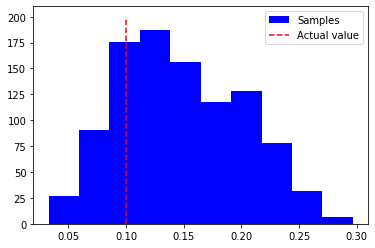

In [13]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=200, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

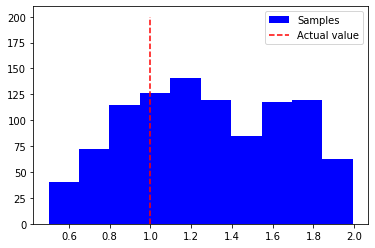

In [14]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=1, linestyles='dashed', ymin=0, ymax=200, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

# Adaptive PMC ABC

In [9]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(500)

# set p_acc_min
abc.sampler().set_p_acc_min(0.05)

# set target number of samples
abc.set_n_samples(1000)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in sequential mode.
w_mean=[0.1700924  1.28768791]
epsilon=4.685082710048992
w_mean=[0.16528964 1.34771488]
epsilon=4.201190307520001
w_mean=[0.15819193 1.34440431]
epsilon=3.9306488014067096
w_mean=[0.14913046 1.3232475 ]
epsilon=3.7416573867739413
w_mean=[0.14728783 1.30087495]
epsilon=3.605551275463989
w_mean=[0.13950847 1.26636797]
epsilon=3.4856850115866753
w_mean=[0.13559672 1.24740463]
epsilon=3.398529093593286
w_mean=[0.13315816 1.22409532]
epsilon=3.3166247903554
w_mean=[0.12746868 1.19440579]
epsilon=3.263433774416144
w_mean=[0.12761929 1.19489162]
epsilon=3.2093613071762426
w_mean=[0.12501426 1.17639651]
epsilon=3.1622776601683795
w_mean=[0.12440638 1.16904729]
epsilon=3.122498999199199
w_mean=[0.12031688 1.13541359]
epsilon=3.0740852297878796
w_mean=[0.12017047 1.13620195]
epsilon=3.0413812651491097
w_mean=[0.12030749 1.13183294]
epsilon=3.0
w_mean=[0.1185371  1.11534026]
epsilon=2.9748949561287032
w_mean=[0.1185048  1.11762446]
eps

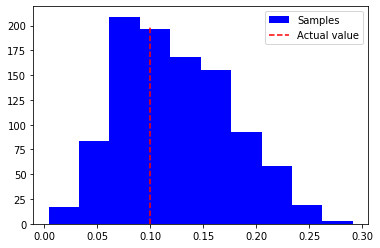

In [10]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=200, label="Actual value", color="red")
plt.legend()
plt.show()

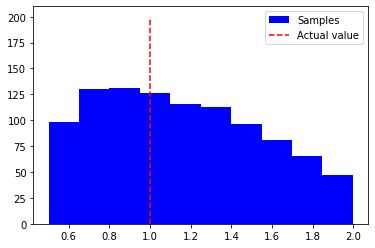

In [11]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=1, linestyles='dashed', ymin=0, ymax=200, label="Actual value", color="red")
plt.legend()
plt.show()